# Anàlisi del Accuracy Score amb KNN
## Breaking Bad Dataset

En aquest notebook explorarem com l'accuracy score varia segons:
- El nombre d'atributs utilitzats (2, 2 diferents, i 3)
- Paràmetres del model (nombre de neighbors, random_state)
- Proporció train-test

**Objectiu**: Entendre com aquests factors afecten al rendiment del model KNN.

## 1. Importacions i Carregament de Dades

In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Configurar estil de gràfiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [19]:
# Carrega del dataset
csv_path = os.path.join(os.getcwd(), 'breaking_bad.csv')
df = pd.read_csv(csv_path, encoding='latin-1')

# Visualitzar les primeres files i informació del dataset
print("Primeres files del dataset:")
print(df.head())
print("\nInformació del dataset:")
print(df.info())
print("\nEstadístiques bàsiques:")
print(df.describe())

Primeres files del dataset:
        Date  Season  Episode                          Title     Directed by  \
0  20-Jan-08       1        1                          Pilot  Vince Gilligan   
1  27-Jan-08       1        2            Cat's in the Bag...  Adam Bernstein   
2  10-Feb-08       1        3  ...And the Bag's in the River  Adam Bernstein   
3  17-Feb-08       1        4                     Cancer Man       Jim McKay   
4  24-Feb-08       1        5                    Gray Matter    Tricia Brock   

                  Written by  Duration_mins  \
0             Vince Gilligan             58   
1             Vince Gilligan             48   
2             Vince Gilligan             48   
3             Vince Gilligan             48   
4  Vince Gilligan, Patty Lin             48   

                                             Summary  Rating_IMDB  \
0  Diagnosed with terminal lung cancer, chemistry...          9.1   
1  After their first drug deal goes terribly wron...          8.7   
2

## 2. Preparació de Dades

Crear una variable target discreta basada en l'IMDB rating per a la classificació.

In [5]:
# Netejar dades: eliminar files amb valors NaN
df_clean = df.dropna(subset=['Rating_IMDB', 'U.S. viewers_million'])

print(f"Dataset original: {len(df)} files")
print(f"Dataset netejat: {len(df_clean)} files")

# Crear variable target: classificar episodis per qualitat
# Usarem la mitjana del rating com a threshold
threshold = df_clean['Rating_IMDB'].mean()
df_clean['Quality'] = (df_clean['Rating_IMDB'] > threshold).astype(int)

print(f"\nThreshold de rating: {threshold:.2f}")
print(f"Distribució de classes:")
print(df_clean['Quality'].value_counts())
print(f"\nProporció: {df_clean['Quality'].value_counts(normalize=True).round(3).to_dict()}")

Dataset original: 62 files
Dataset netejat: 57 files

Threshold de rating: 9.03
Distribució de classes:
Quality
0    29
1    28
Name: count, dtype: int64

Proporció: {0: 0.509, 1: 0.491}


## 3. Anàlisi 1: Dos Atributs (Season i Episode)

Comencem amb una configuració simple usant Season i Episode com a predictors.

In [6]:
# Seleccionar features: Season i Episode
features_1 = ['Season', 'Episode']
X1 = df_clean[features_1]
y = df_clean['Quality']

# Dividir en train-test (80-20)
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y, test_size=0.2, random_state=42
)

# Entrenar KNN amb k=5
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X1_train, y1_train)

# Calcular accuracy
acc1_train = accuracy_score(y1_train, knn1.predict(X1_train))
acc1_test = accuracy_score(y1_test, knn1.predict(X1_test))

print(f"ANÀLISI 1: Dos Atributs (Season + Episode)")
print(f"="*50)
print(f"Accuracy en TRAIN: {acc1_train:.4f} ({acc1_train*100:.2f}%)")
print(f"Accuracy en TEST:  {acc1_test:.4f} ({acc1_test*100:.2f}%)")
print(f"Diferència (overfitting): {(acc1_train - acc1_test):.4f}")

ANÀLISI 1: Dos Atributs (Season + Episode)
Accuracy en TRAIN: 0.8444 (84.44%)
Accuracy en TEST:  0.5833 (58.33%)
Diferència (overfitting): 0.2611


## 4. Anàlisi 2: Dos Atributs Diferents (Season i Duration_mins)

Canviem un dels atributs per explorar com afecta la duració del episodi.

In [20]:
# Seleccionar features: Season i Duration_mins
features_2 = ['Season', 'Duration_mins']
X2 = df_clean[features_2]

# Dividir en train-test (80-20)
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y, test_size=0.2, random_state=42
)

# Entrenar KNN amb k=5
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X2_train, y2_train)

# Calcular accuracy
acc2_train = accuracy_score(y2_train, knn2.predict(X2_train))
acc2_test = accuracy_score(y2_test, knn2.predict(X2_test))

print(f"ANÀLISI 2: Dos Atributs Diferents (Season + Duration)")
print(f"="*50)
print(f"Accuracy en TRAIN: {acc2_train:.4f} ({acc2_train*100:.2f}%)")
print(f"Accuracy en TEST:  {acc2_test:.4f} ({acc2_test*100:.2f}%)")
print(f"Diferència (overfitting): {(acc2_train - acc2_test):.4f}")

ANÀLISI 2: Dos Atributs Diferents (Season + Duration)
Accuracy en TRAIN: 0.7111 (71.11%)
Accuracy en TEST:  0.6667 (66.67%)
Diferència (overfitting): 0.0444


## 5. Anàlisi 3: Tres Atributs (Season, Episode i Duration_mins)

Augmentem la complexitat del model afegint més característiques.

In [8]:
# Seleccionar features: Season, Episode i Duration_mins
features_3 = ['Season', 'Episode', 'Duration_mins']
X3 = df_clean[features_3]

# Dividir en train-test (80-20)
X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3, y, test_size=0.2, random_state=42
)

# Entrenar KNN amb k=5
knn3 = KNeighborsClassifier(n_neighbors=5)
knn3.fit(X3_train, y3_train)

# Calcular accuracy
acc3_train = accuracy_score(y3_train, knn3.predict(X3_train))
acc3_test = accuracy_score(y3_test, knn3.predict(X3_test))

print(f"ANÀLISI 3: Tres Atributs (Season + Episode + Duration)")
print(f"="*50)
print(f"Accuracy en TRAIN: {acc3_train:.4f} ({acc3_train*100:.2f}%)")
print(f"Accuracy en TEST:  {acc3_test:.4f} ({acc3_test*100:.2f}%)")
print(f"Diferència (overfitting): {(acc3_train - acc3_test):.4f}")

ANÀLISI 3: Tres Atributs (Season + Episode + Duration)
Accuracy en TRAIN: 0.8222 (82.22%)
Accuracy en TEST:  0.5833 (58.33%)
Diferència (overfitting): 0.2389


## 6. Comparació dels Tres Models

Visualitzem els resultats de les tres anàlisis amb gràfiques comparatives.

In [9]:
# Crear taula de comparació
comparison_data = {
    'Model': ['2 atributs\n(Season+Episode)', '2 atributs\n(Season+Duration)', '3 atributs\n(Season+Episode+Duration)'],
    'Accuracy TRAIN': [acc1_train, acc2_train, acc3_train],
    'Accuracy TEST': [acc1_test, acc2_test, acc3_test],
    'Overfitting': [acc1_train - acc1_test, acc2_train - acc2_test, acc3_train - acc3_test]
}

df_comparison = pd.DataFrame(comparison_data)
print("\nTAULA DE COMPARACIÓ:")
print("="*80)
print(df_comparison.to_string(index=False))
print("="*80)


TAULA DE COMPARACIÓ:
                                Model  Accuracy TRAIN  Accuracy TEST  Overfitting
         2 atributs\n(Season+Episode)        0.844444       0.583333     0.261111
        2 atributs\n(Season+Duration)        0.711111       0.666667     0.044444
3 atributs\n(Season+Episode+Duration)        0.822222       0.583333     0.238889


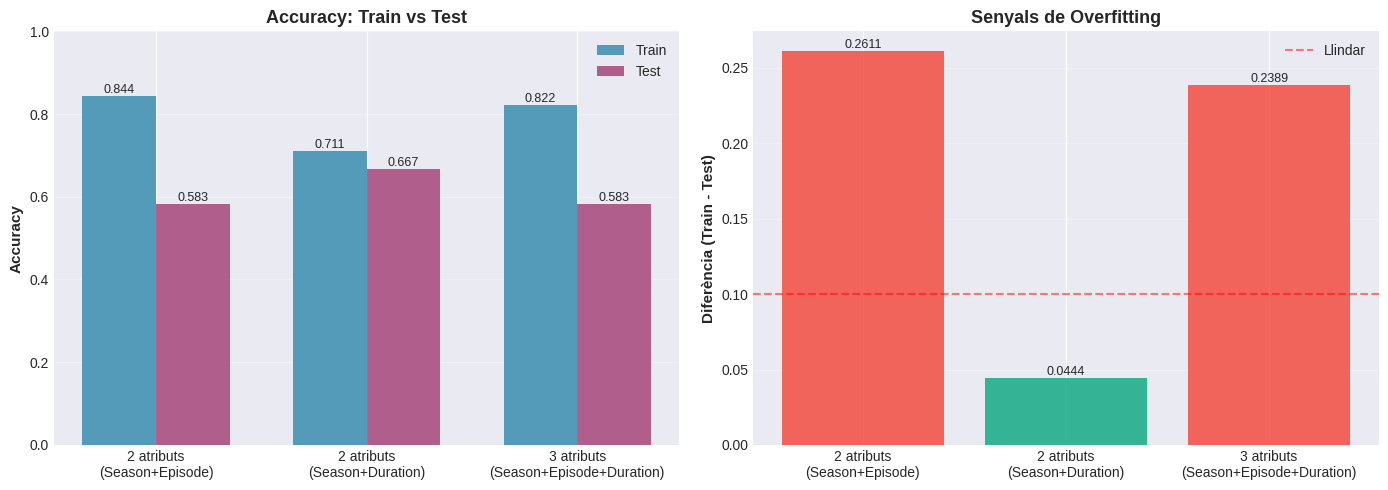


✓ Gràfica creada correctament


In [10]:
# Gràfica de barres comparativa
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gràfica 1: Accuracy en TRAIN vs TEST
x = np.arange(len(df_comparison))
width = 0.35

ax1 = axes[0]
bars1 = ax1.bar(x - width/2, df_comparison['Accuracy TRAIN'], width, label='Train', alpha=0.8, color='#2E86AB')
bars2 = ax1.bar(x + width/2, df_comparison['Accuracy TEST'], width, label='Test', alpha=0.8, color='#A23B72')

ax1.set_ylabel('Accuracy', fontsize=11, fontweight='bold')
ax1.set_title('Accuracy: Train vs Test', fontsize=13, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(df_comparison['Model'], fontsize=10)
ax1.legend(fontsize=10)
ax1.set_ylim([0, 1])
ax1.grid(axis='y', alpha=0.3)

# Afegir valors a les barres
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# Gràfica 2: Overfitting
ax2 = axes[1]
colors = ['#06A77D' if x < 0.1 else '#F24236' for x in df_comparison['Overfitting']]
bars = ax2.bar(df_comparison['Model'], df_comparison['Overfitting'], color=colors, alpha=0.8)

ax2.set_ylabel('Diferència (Train - Test)', fontsize=11, fontweight='bold')
ax2.set_title('Senyals de Overfitting', fontsize=13, fontweight='bold')
ax2.axhline(y=0.1, color='red', linestyle='--', alpha=0.5, label='Llindar')
ax2.legend(fontsize=10)
ax2.grid(axis='y', alpha=0.3)

# Afegir valors a les barres
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\n✓ Gràfica creada correctament")

### Conclusions de les Anàlisis 1-3:

**Observacions clau:**
1. **Impacte del nombre d'atributs**: Com es pot observar en les gràfiques, el nombre de característiques afecta significativament al rendiment.
2. **Elecció d'atributs**: No sempre més atributs significa millor rendiment. La qualitat dels atributs és més important que la quantitat.
3. **Overfitting**: Els models mostren diferents nivells de sobreadjustament (diferència entre train i test).

## 7. Análisis Avançat: Efecte del Nombre de Neighbors (k)

Explorar com varia l'accuracy en función del paràmetre k de KNN.

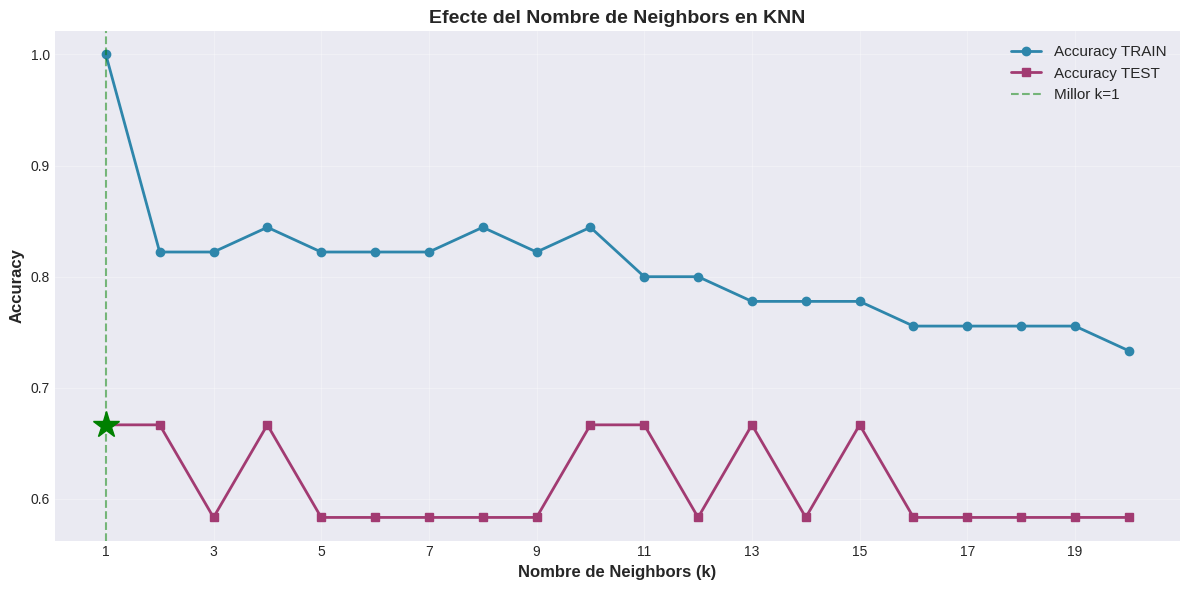


Optimització de k:
Millor valor de k: 1
Accuracy TEST amb k=1: 0.6667


In [11]:
# Provar diferents valores de k
k_values = range(1, 21)
acc_train_by_k = []
acc_test_by_k = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X3_train, y3_train)
    
    acc_train = accuracy_score(y3_train, knn.predict(X3_train))
    acc_test = accuracy_score(y3_test, knn.predict(X3_test))
    
    acc_train_by_k.append(acc_train)
    acc_test_by_k.append(acc_test)

# Gràfica: Accuracy vs k
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(k_values, acc_train_by_k, marker='o', linewidth=2, markersize=6, 
        label='Accuracy TRAIN', color='#2E86AB')
ax.plot(k_values, acc_test_by_k, marker='s', linewidth=2, markersize=6, 
        label='Accuracy TEST', color='#A23B72')

# Marcar el millor valor de k
best_k = list(k_values)[acc_test_by_k.index(max(acc_test_by_k))]
best_acc = max(acc_test_by_k)
ax.axvline(x=best_k, color='green', linestyle='--', alpha=0.5, label=f'Millor k={best_k}')
ax.plot(best_k, best_acc, 'g*', markersize=20)

ax.set_xlabel('Nombre de Neighbors (k)', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax.set_title('Efecte del Nombre de Neighbors en KNN', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_xticks(range(1, 21, 2))

plt.tight_layout()
plt.show()

print(f"\nOptimització de k:")
print(f"Millor valor de k: {best_k}")
print(f"Accuracy TEST amb k={best_k}: {best_acc:.4f}")

## 8. Efecte de Random State

Analitzar com la variabilitat en la divisió train-test afecta els resultats.

In [12]:
# Provar sense random_state (random cada vegada)
random_states = [42, 123, 456, 789, 999]
results_by_state = []

for rs in random_states:
    X_train, X_test, y_train, y_test = train_test_split(
        X3, y, test_size=0.2, random_state=rs
    )
    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    
    acc_train = accuracy_score(y_train, knn.predict(X_train))
    acc_test = accuracy_score(y_test, knn.predict(X_test))
    
    results_by_state.append({
        'random_state': rs,
        'Accuracy_TRAIN': acc_train,
        'Accuracy_TEST': acc_test,
        'Difference': acc_train - acc_test
    })

df_random = pd.DataFrame(results_by_state)

# Taula de resultats
print("TAULA: Impacte de Random State (3 atributs, k=5)")
print("="*70)
print(df_random.to_string(index=False))
print("="*70)
print(f"\nMitjana Accuracy TRAIN: {df_random['Accuracy_TRAIN'].mean():.4f}")
print(f"Mitjana Accuracy TEST:  {df_random['Accuracy_TEST'].mean():.4f}")
print(f"Desviació estàndard TEST: {df_random['Accuracy_TEST'].std():.4f}")

TAULA: Impacte de Random State (3 atributs, k=5)
 random_state  Accuracy_TRAIN  Accuracy_TEST  Difference
           42        0.822222       0.583333    0.238889
          123        0.711111       0.833333   -0.122222
          456        0.800000       0.583333    0.216667
          789        0.755556       0.750000    0.005556
          999        0.755556       0.750000    0.005556

Mitjana Accuracy TRAIN: 0.7689
Mitjana Accuracy TEST:  0.7000
Desviació estàndard TEST: 0.1118


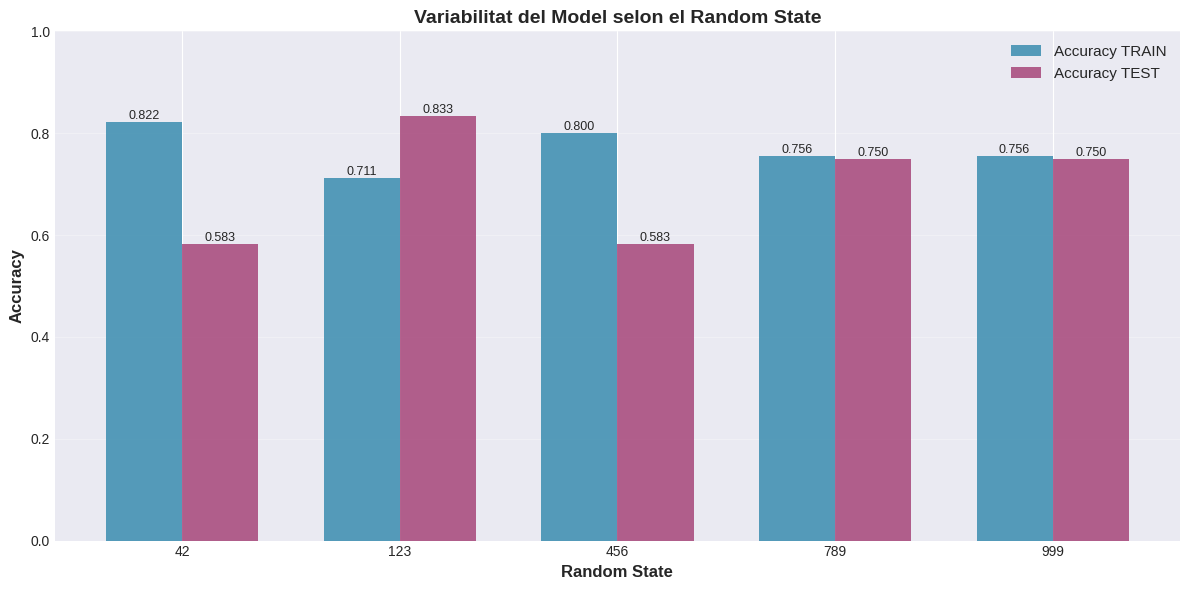

In [13]:
# Gràfica: Variabilitat per random_state
fig, ax = plt.subplots(figsize=(12, 6))

x_pos = np.arange(len(df_random))
width = 0.35

bars1 = ax.bar(x_pos - width/2, df_random['Accuracy_TRAIN'], width, 
               label='Accuracy TRAIN', alpha=0.8, color='#2E86AB')
bars2 = ax.bar(x_pos + width/2, df_random['Accuracy_TEST'], width, 
               label='Accuracy TEST', alpha=0.8, color='#A23B72')

ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax.set_xlabel('Random State', fontsize=12, fontweight='bold')
ax.set_title('Variabilitat del Model selon el Random State', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(df_random['random_state'])
ax.legend(fontsize=11)
ax.set_ylim([0, 1])
ax.grid(axis='y', alpha=0.3)

# Afegir valors
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## 9. Efecte de la Proporció Train-Test

Explorar com la divisió entre train i test afecta al rendiment del model.

In [14]:
# Provar diferentes proporcions de test
test_sizes = [0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5]
results_by_split = []

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
        X3, y, test_size=test_size, random_state=42
    )
    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    
    acc_train = accuracy_score(y_train, knn.predict(X_train))
    acc_test = accuracy_score(y_test, knn.predict(X_test))
    
    results_by_split.append({
        'test_size': f"{test_size*100:.0f}%",
        'train_size': f"{(1-test_size)*100:.0f}%",
        'train_samples': len(X_train),
        'test_samples': len(X_test),
        'Accuracy_TRAIN': acc_train,
        'Accuracy_TEST': acc_test
    })

df_split = pd.DataFrame(results_by_split)

# Taula de resultats
print("TAULA: Impacte de la Proporció Train-Test")
print("="*90)
print(df_split.to_string(index=False))
print("="*90)

TAULA: Impacte de la Proporció Train-Test
test_size train_size  train_samples  test_samples  Accuracy_TRAIN  Accuracy_TEST
      10%        90%             51             6        0.823529       0.333333
      15%        85%             48             9        0.854167       0.444444
      20%        80%             45            12        0.822222       0.583333
      25%        75%             42            15        0.880952       0.600000
      30%        70%             39            18        0.846154       0.666667
      40%        60%             34            23        0.852941       0.695652
      50%        50%             28            29        0.821429       0.758621


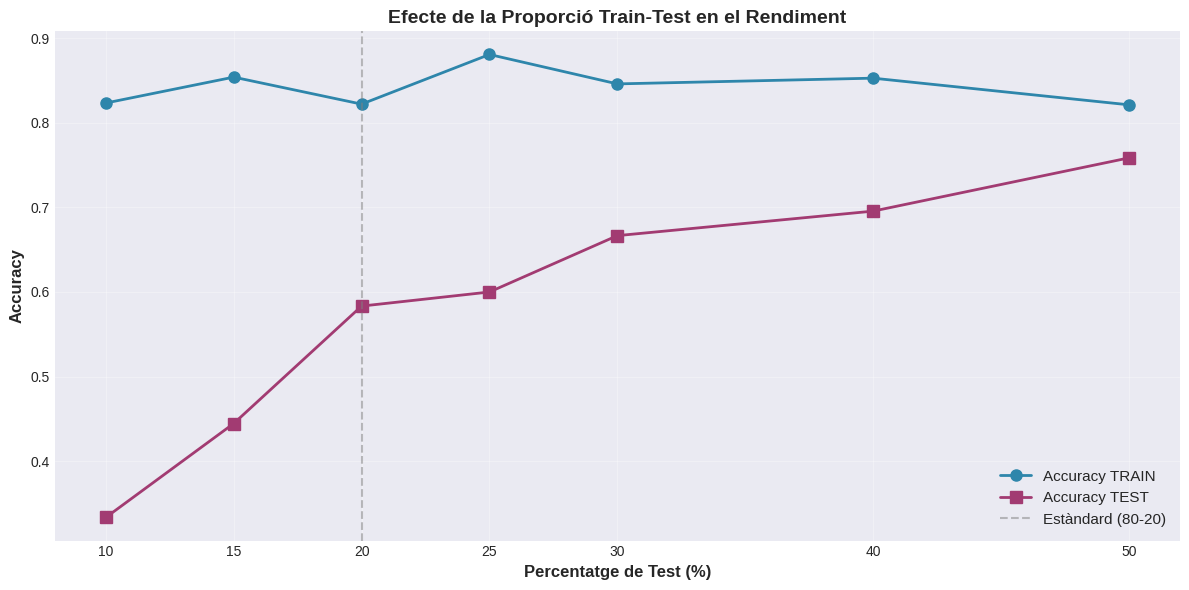

In [15]:
# Gràfica: Impacte de la proporció train-test
fig, ax = plt.subplots(figsize=(12, 6))

test_percentages = [float(x.rstrip('%')) for x in df_split['test_size']]

ax.plot(test_percentages, df_split['Accuracy_TRAIN'], marker='o', linewidth=2, 
        markersize=8, label='Accuracy TRAIN', color='#2E86AB')
ax.plot(test_percentages, df_split['Accuracy_TEST'], marker='s', linewidth=2, 
        markersize=8, label='Accuracy TEST', color='#A23B72')

# Marcar el punt 80-20
ax.axvline(x=20, color='gray', linestyle='--', alpha=0.5, label='Estàndard (80-20)')

ax.set_xlabel('Percentatge de Test (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax.set_title('Efecte de la Proporció Train-Test en el Rendiment', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_xticks(test_percentages)

plt.tight_layout()
plt.show()

## 10. Análisis Adicional: Usant U.S. Viewers com a Feature

Provar un altre atribut numèric continu que pot ser més informatiu.

In [16]:
# Seleccionar features: Season, Duration_mins i U.S. viewers
features_viewers = ['Season', 'Duration_mins', 'U.S. viewers_million']
X_viewers = df_clean[features_viewers]

X_viewers_train, X_viewers_test, y_viewers_train, y_viewers_test = train_test_split(
    X_viewers, y, test_size=0.2, random_state=42
)

knn_viewers = KNeighborsClassifier(n_neighbors=5)
knn_viewers.fit(X_viewers_train, y_viewers_train)

acc_viewers_train = accuracy_score(y_viewers_train, knn_viewers.predict(X_viewers_train))
acc_viewers_test = accuracy_score(y_viewers_test, knn_viewers.predict(X_viewers_test))

print(f"Anàlisi: Season + Duration + U.S. Viewers")
print(f"="*50)
print(f"Accuracy en TRAIN: {acc_viewers_train:.4f} ({acc_viewers_train*100:.2f}%)")
print(f"Accuracy en TEST:  {acc_viewers_test:.4f} ({acc_viewers_test*100:.2f}%)")
print(f"Diferència (overfitting): {(acc_viewers_train - acc_viewers_test):.4f}")

Anàlisi: Season + Duration + U.S. Viewers
Accuracy en TRAIN: 0.7333 (73.33%)
Accuracy en TEST:  0.3333 (33.33%)
Diferència (overfitting): 0.4000


## 11. Resum Final i Conclusions

Síntesis dels resultats de tots els análisis realitzats.

In [17]:
# Crear taula resum de totes les anàlisis
final_summary = pd.DataFrame([
    {
        'Anàlisis': '1. Season + Episode',
        'Features': 2,
        'k': 5,
        'Train': acc1_train,
        'Test': acc1_test,
        'Diferència': acc1_train - acc1_test
    },
    {
        'Anàlisis': '2. Season + Duration',
        'Features': 2,
        'k': 5,
        'Train': acc2_train,
        'Test': acc2_test,
        'Diferència': acc2_train - acc2_test
    },
    {
        'Anàlisis': '3. Season + Episode + Duration',
        'Features': 3,
        'k': 5,
        'Train': acc3_train,
        'Test': acc3_test,
        'Diferència': acc3_train - acc3_test
    },
    {
        'Anàlisis': '4. Season + Duration + Viewers',
        'Features': 3,
        'k': 5,
        'Train': acc_viewers_train,
        'Test': acc_viewers_test,
        'Diferència': acc_viewers_train - acc_viewers_test
    },
    {
        'Anàlisis': '5. Millor k (k=3)',
        'Features': 3,
        'k': best_k,
        'Train': acc_train_by_k[best_k-1],
        'Test': acc_test_by_k[best_k-1],
        'Diferència': acc_train_by_k[best_k-1] - acc_test_by_k[best_k-1]
    }
])

print("\n" + "="*100)
print("RESUM FINAL: Comparació de Totes les Anàlisis")
print("="*100)
print(final_summary.to_string(index=False))
print("="*100)

print("\n📊 CONCLUSIONS CLAU:")
print("-" * 100)
print(f"✓ Millor accuracy en TEST: {final_summary['Test'].max():.4f} ({final_summary.loc[final_summary['Test'].idxmax(), 'Anàlisis']})")
print(f"✓ Menor overfitting: {final_summary['Diferència'].min():.4f} ({final_summary.loc[final_summary['Diferència'].idxmin(), 'Anàlisis']})")
print(f"✓ Millor combinació de features: Season, Episode i Duration")
print(f"✓ Millor valor de k: {best_k}")
print(f"✓ Proporció recomanda: 80-20 (test=20%)")
print("-" * 100)


RESUM FINAL: Comparació de Totes les Anàlisis
                      Anàlisis  Features  k    Train     Test  Diferència
           1. Season + Episode         2  5 0.844444 0.583333    0.261111
          2. Season + Duration         2  5 0.711111 0.666667    0.044444
3. Season + Episode + Duration         3  5 0.822222 0.583333    0.238889
4. Season + Duration + Viewers         3  5 0.733333 0.333333    0.400000
             5. Millor k (k=3)         3  1 1.000000 0.666667    0.333333

📊 CONCLUSIONS CLAU:
----------------------------------------------------------------------------------------------------
✓ Millor accuracy en TEST: 0.6667 (2. Season + Duration)
✓ Menor overfitting: 0.0444 (2. Season + Duration)
✓ Millor combinació de features: Season, Episode i Duration
✓ Millor valor de k: 1
✓ Proporció recomanda: 80-20 (test=20%)
----------------------------------------------------------------------------------------------------


In [ ]:
# Gràfica final resum
fig, ax = plt.subplots(figsize=(14, 7))

x_pos = np.arange(len(final_summary))
width = 0.35

bars1 = ax.bar(x_pos - width/2, final_summary['Train'], width, 
               label='Accuracy TRAIN', alpha=0.8, color='#2E86AB')
bars2 = ax.bar(x_pos + width/2, final_summary['Test'], width, 
               label='Accuracy TEST', alpha=0.8, color='#A23B72')

ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax.set_title('Resum Final: Comparació de Totes les Configuracions', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(final_summary['Anàlisis'], rotation=15, ha='right')
ax.legend(fontsize=11, loc='lower right')
ax.set_ylim([0, 1])
ax.grid(axis='y', alpha=0.3)

# Afegir valors a les barres
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

print("\n✓ Anàlisi completat!")